In [50]:
import keras
keras.backend.clear_session()


import os
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

# Set the path to your data folders
ad_folder = "/gpfs/data/user/devanand/scripts/ASR_epochwise_EC_PSD/AD"
he_folder = "/gpfs/data/user/devanand/scripts/ASR_epochwise_EC_PSD/HE"

# Function to load data from mat files
def load_data(folder):
    data = []
    for filename in os.listdir(folder):
        if filename.endswith(".mat"):
            file_path = os.path.join(folder, filename)
            mat_data = scipy.io.loadmat(file_path)
            vector = mat_data['pp']  # Replace 'your_vector_key' with the key in your mat file
            data.append(vector)
    return data

# Load data from AD and HE folders
ad_data = load_data(ad_folder)
he_data = load_data(he_folder)

# Combine and label the data
X = np.vstack(ad_data + he_data)
y = np.hstack([np.zeros(len(ad_data)), np.ones(len(he_data))])

# Perform one-hot encoding on labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.25, random_state=42)

# Define the neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(48,)))
model.add(layers.Dropout(0.5))  # Add dropout here
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))  # Add dropout here
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy}")

Epoch 1/1000


/gpfs/data/user/devanand/.conda/envs/test-gpu/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


141/141 [==============================] - 1s 6ms/step - loss: 0.8173 - accuracy: 0.5076 - val_loss: 0.6838 - val_accuracy: 0.5987
Epoch 2/1000
141/141 [==============================] - 1s 4ms/step - loss: 0.7173 - accuracy: 0.5293 - val_loss: 0.6730 - val_accuracy: 0.6467
Epoch 3/1000
141/141 [==============================] - 1s 4ms/step - loss: 0.7047 - accuracy: 0.5573 - val_loss: 0.6745 - val_accuracy: 0.5893
Epoch 4/1000
141/141 [==============================] - 1s 4ms/step - loss: 0.6944 - accuracy: 0.5760 - val_loss: 0.6657 - val_accuracy: 0.6253
Epoch 5/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.5902 - val_loss: 0.6532 - val_accuracy: 0.6173
Epoch 6/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.6107 - val_loss: 0.6408 - val_accuracy: 0.6453
Epoch 7/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.6218 - val_loss: 0.6359 - val_accuracy: 0.6627
Epoch

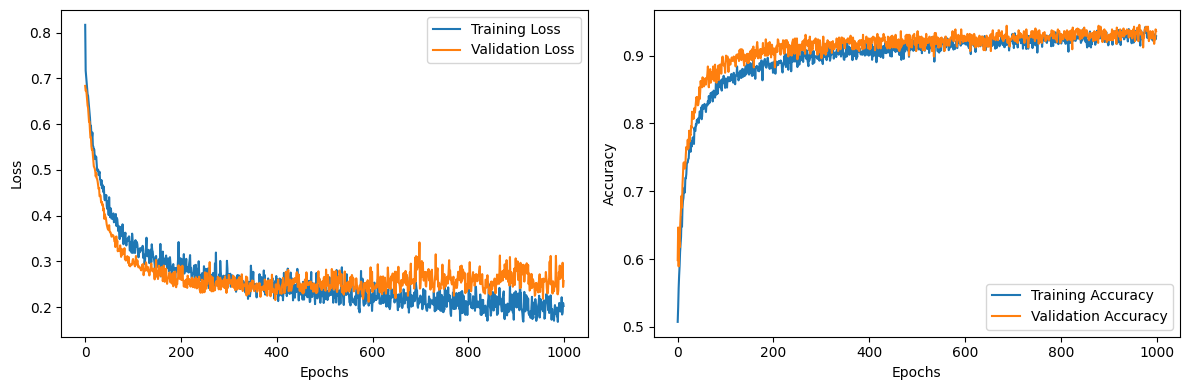

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3136      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,282
Trainable params: 5,282
Non-trainable params: 0
_________________________________________________________________


In [51]:
import matplotlib.pyplot as plt


# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model.summary()

In [64]:
unseen_class_0_path = "/gpfs/data/user/devanand/scripts/ASR_epochwise_EC_PSD/AD_test"
unseen_class_1_path = "/gpfs/data/user/devanand/scripts/ASR_epochwise_EC_PSD/HE_test"

unseen_class_0_images = np.array(load_data(unseen_class_0_path)).reshape(240,48)
unseen_class_1_images = np.array(load_data(unseen_class_1_path)).reshape(270,48)

unseen_labels = np.concatenate([np.zeros(len(unseen_class_0_images)), np.ones(len(unseen_class_1_images))])
# unseen_labels = to_categorical(unseen_labels)

# Perform one-hot encoding on labels
# encoder = OneHotEncoder(sparse=False)
unseen_labels = encoder.fit_transform(unseen_labels.reshape(-1, 1))

all_unseen_images = np.concatenate([unseen_class_0_images, unseen_class_1_images])


evaluation = model.evaluate(all_unseen_images, unseen_labels)
print("Evaluation Loss: {:.4f}, Accuracy: {:.2f}%".format(evaluation[0], evaluation[1] * 100))

predictions = model.predict(all_unseen_images)

16/16 [==============================] - 0s 3ms/step - loss: 0.2975 - accuracy: 0.9275
Evaluation Loss: 0.2975, Accuracy: 92.75%
16/16 [==============================] - 0s 2ms/step


/gpfs/data/user/devanand/.conda/envs/test-gpu/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/gpfs/data/user/devanand/.conda/envs/test-gpu/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


88/94 [===========================>..] - ETA: 0s

/gpfs/data/user/devanand/.conda/envs/test-gpu/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


16/16 [==============================] - 0s 2ms/step


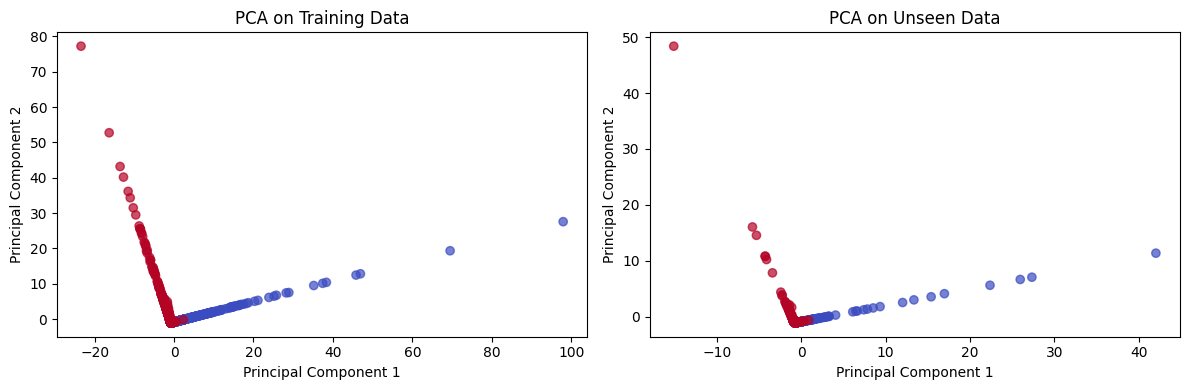

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from keras.models import Model

# Load data from AD and HE folders
ad_data = np.array(load_data(ad_folder)).reshape(1500,48)
he_data = np.array(load_data(he_folder)).reshape(1500,48)
# Create labels (0 for class_0, 1 for class_1)
labels=[]
labels = np.concatenate([np.zeros(len(ad_data)), np.ones(len(he_data))])
labels = encoder.fit_transform(labels.reshape(-1, 1))
all_images = np.concatenate([ad_data, he_data])


# Load images for both classes
class_0_images = np.array(load_data(unseen_class_0_path)).reshape(240,48)
class_1_images = np.array(load_data(unseen_class_1_path)).reshape(270,48)
unseen_labels=[]
# Create labels (0 for class_0, 1 for class_1)
unseen_labels = np.concatenate([np.zeros(len(class_0_images)), np.ones(len(class_1_images))])
unseen_labels = encoder.fit_transform(unseen_labels.reshape(-1, 1))
all_unseen_images = np.concatenate([class_0_images, class_1_images])


# Create a model to get intermediate layer outputs
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)


# Get intermediate layer outputs for both training and unseen data
intermediate_train_outputs = intermediate_layer_model.predict(all_images)
intermediate_unseen_outputs = intermediate_layer_model.predict(all_unseen_images)

# Normalize the outputs
scaler = StandardScaler()
intermediate_train_outputs_normalized = scaler.fit_transform(intermediate_train_outputs)
intermediate_unseen_outputs_normalized = scaler.transform(intermediate_unseen_outputs)

# Apply PCA
pca = PCA(n_components=2)  # You can adjust the number of components
pca_train_outputs = pca.fit_transform(intermediate_train_outputs_normalized)
pca_unseen_outputs = pca.transform(intermediate_unseen_outputs_normalized)

# Plot PCA Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(pca_train_outputs[:, 0], pca_train_outputs[:, 1], c=labels[:, 1], cmap='coolwarm', alpha=0.7)
plt.title('PCA on Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(pca_unseen_outputs[:, 0], pca_unseen_outputs[:, 1], c=unseen_labels[:, 1], cmap='coolwarm', alpha=0.7)
plt.title('PCA on Unseen Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

/gpfs/data/user/devanand/.conda/envs/test-gpu/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


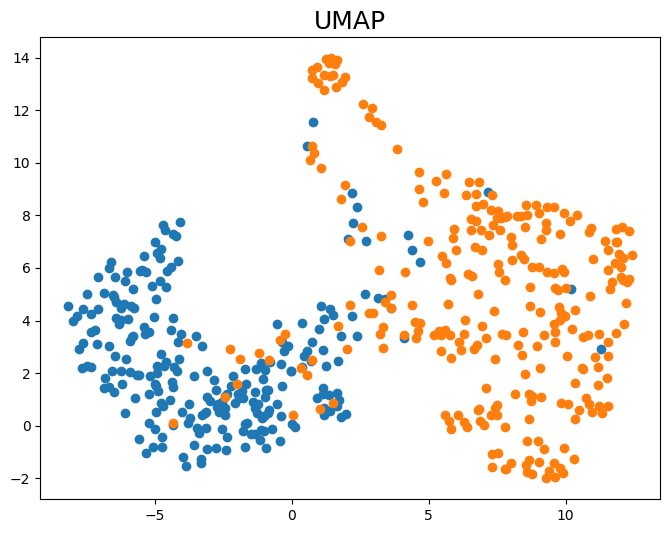

In [66]:
import umap

# reducer = umap.UMAP(random_state=42)
reducer = umap.UMAP(n_neighbors=5,min_dist=1.0,n_components=3,metric='euclidean',n_epochs=2000)
embedding = reducer.fit_transform(intermediate_unseen_outputs_normalized)

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(embedding[0:240, 0], embedding[0:240, 1])#,  cmap="Spectral", s=0.1)
plt.scatter(embedding[240::, 0], embedding[240::, 1])#,  cmap="Spectral", s=0.1)

plt.title("UMAP", fontsize=18)

plt.show()

/gpfs/data/user/devanand/.conda/envs/test-gpu/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


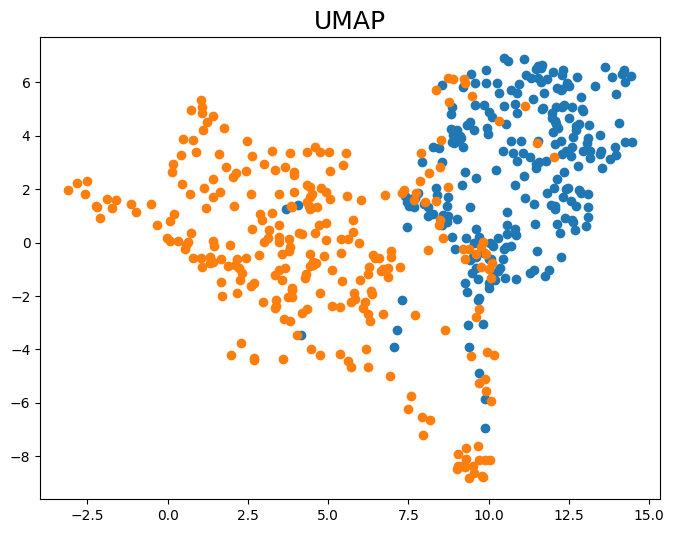

In [68]:
# reducer = umap.UMAP(random_state=42)
reducer = umap.UMAP(n_neighbors=5,min_dist=1.0,n_components=3,metric='correlation',n_epochs=2000,random_state=42)
embedding = reducer.fit_transform(intermediate_unseen_outputs_normalized)

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(embedding[0:240, 0], embedding[0:240, 1])#,  cmap="Spectral", s=0.1)
plt.scatter(embedding[240::, 0], embedding[240::, 1])#,  cmap="Spectral", s=0.1)

plt.title("UMAP", fontsize=18)

plt.show()

In [71]:
# `rankdir='LR'` is to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [72]:
model.save('classifier_AD_HE')

INFO:tensorflow:Assets written to: classifier_AD_HE/assets


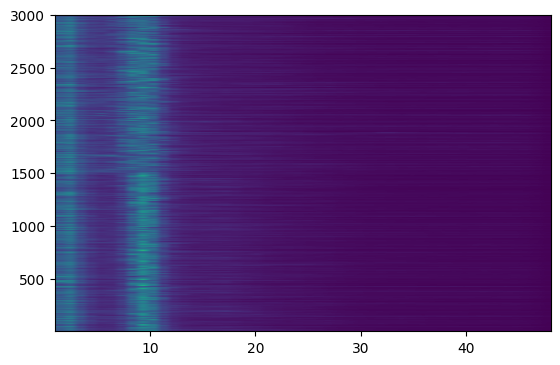

In [4]:
# Eyes Close data
import numpy as np
import os
import scipy
# Set the path to your data folders
ad_folder = "/gpfs/data/user/devanand/scripts/ASR_epochwise_EC_PSD/AD"
he_folder = "/gpfs/data/user/devanand/scripts/ASR_epochwise_EC_PSD/HE"

# Function to load data from mat files
def load_data(folder):
    data = []
    for filename in os.listdir(folder):
        if filename.endswith(".mat"):
            file_path = os.path.join(folder, filename)
            mat_data = scipy.io.loadmat(file_path)
            vector = mat_data['pp']  # Replace 'your_vector_key' with the key in your mat file
            data.append(vector)
    return data

# Load data from AD and HE folders
ad_data = np.array(load_data(ad_folder)).reshape(1500,48)
he_data = np.array(load_data(he_folder)).reshape(1500,48)
# # Create labels (0 for class_0, 1 for class_1)
# labels=[]
# labels = np.concatenate([np.zeros(len(ad_data)), np.ones(len(he_data))])
# labels = encoder.fit_transform(labels.reshape(-1, 1))
all_images = np.concatenate([ad_data, he_data])

from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
data = normalize(all_images, axis=1, norm='l2')
plt.imshow(data,extent=[1, 48, 1, 3000], aspect=0.01)#,cmap='gray')

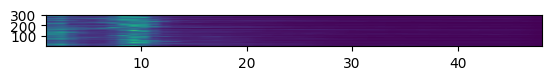

In [7]:
plt.imshow(data[0::21,:],extent=[1, 48, 1, 300], aspect=0.01)#,cmap='gray')

In [50]:
##############################################################################################
import keras
keras.backend.clear_session()

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import scipy.io

# Specify the folder path containing the MAT files
mci_folder = "/gpfs/data/user/devanand/scripts/NN/MCI_PSD_agematched/MCI_PSD.mat"
hc_folder = "/gpfs/data/user/devanand/scripts/NN/HC_PSD_agematched/HC_PSD.mat"

# Load data from AD and HE folders
mci_data = scipy.io.loadmat(mci_folder)['MCI_PSD']
hc_data = scipy.io.loadmat(hc_folder)['HC_PSD']

np.random.shuffle(mci_data)
np.random.shuffle(hc_data)

characters = ['{} Hz'.format(i) for i in range(1, 49)]
print(characters)

# characters=['Variance','Skewness','Kurtosis','Shape Factor','Peak Amp','Impulse factor','Crest factor','clearance factor','Willison Amp','ZCR','Sample Entropy','Approx. Entropy',
#            'permutation entropy','state space corr ent','corr dim','Higuchi Fractal dimension','Katz Fractal dim','Lyapunov Exp','Hurst Exponent',
#            'Lempel-Ziv Complexity','Hjorth Activity','Hjorth Mobility','Hjorth Complexity','alpha dominant freq','gamma dominant freq','Spectral Roll Off',
#            'Spectral Centroid','Spectral Spread','Spectral Flux','Spectral Skewness','Spectral Kurtosis','Theta Beta Ratio','Theta Alpha Ratio',
#            'Gamma alpha ratio','Spectral Power Ratio','Wavelet Energy Approx','Wavelet Energy Detail','Relative Wavelet Energy','Wavelet Packet Energy Approx',
#             'Wavelet Packet Energy Detail','Relative Wavelet Packet Energy']
# print(len(characters))

# new_ind = list(range(23)) + list(range(25,43)) # Removing 'Dominant Frequency' and 'Median Frequency' features
# print(new_ind)
# characters_subset=[characters[i] for i in new_ind]
# print(characters_subset)
# print(len(characters_subset))

mci_train_test = mci_data[0:900, :]
hc_train_test = hc_data[0:900, :]

# mci_unseen = mci_data[900::, :]
# hc_unseen = hc_data[900::, :]

# Combine and label the data
X = np.vstack((mci_train_test, hc_train_test))
y = np.hstack([np.zeros(len(mci_train_test)), np.ones(len(hc_train_test))])

# Perform one-hot encoding on labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.25, random_state=42)             




# Set the number of runs
num_runs = 1

# Lists to store the models and test accuracies
models = []
test_accuracies = []
histories = []

for run in range(num_runs):
    print(f"Training Run {run + 1}/{num_runs}")

    # Clear previous session
    keras.backend.clear_session()

    # Define the neural network model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(48,)))
    model.add(Dropout(0.5))  # Add dropout here
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout here
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True),
                                   ModelCheckpoint(f'agematchedASR_model_{run}.h5', save_best_only=True)])

    # Save the model and append to the list
    models.append(model)
    histories.append(history)    

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    test_accuracies.append(test_acc)

# Calculate and print the average test accuracy
average_test_accuracy = np.mean(test_accuracies)
print(f'Average Test Accuracy: {average_test_accuracy}')

['1 Hz', '2 Hz', '3 Hz', '4 Hz', '5 Hz', '6 Hz', '7 Hz', '8 Hz', '9 Hz', '10 Hz', '11 Hz', '12 Hz', '13 Hz', '14 Hz', '15 Hz', '16 Hz', '17 Hz', '18 Hz', '19 Hz', '20 Hz', '21 Hz', '22 Hz', '23 Hz', '24 Hz', '25 Hz', '26 Hz', '27 Hz', '28 Hz', '29 Hz', '30 Hz', '31 Hz', '32 Hz', '33 Hz', '34 Hz', '35 Hz', '36 Hz', '37 Hz', '38 Hz', '39 Hz', '40 Hz', '41 Hz', '42 Hz', '43 Hz', '44 Hz', '45 Hz', '46 Hz', '47 Hz', '48 Hz']
Training Run 1/1
Epoch 1/1000


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


85/85 [==============================] - 1s 6ms/step - loss: 2.2270 - accuracy: 0.5156 - val_loss: 0.6865 - val_accuracy: 0.5467
Epoch 2/1000
85/85 [==============================] - 0s 5ms/step - loss: 0.8395 - accuracy: 0.4830 - val_loss: 0.6909 - val_accuracy: 0.5044
Epoch 3/1000
85/85 [==============================] - 0s 4ms/step - loss: 0.7405 - accuracy: 0.5141 - val_loss: 0.6897 - val_accuracy: 0.4978
Epoch 4/1000
85/85 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.4993 - val_loss: 0.6856 - val_accuracy: 0.5756
Epoch 5/1000
85/85 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5444 - val_loss: 0.6833 - val_accuracy: 0.5689
Epoch 6/1000
85/85 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5474 - val_loss: 0.6797 - val_accuracy: 0.5800
Epoch 7/1000
85/85 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.5630 - val_loss: 0.6809 - val_accuracy: 0.5822
Epoch 8/1000
85/85 

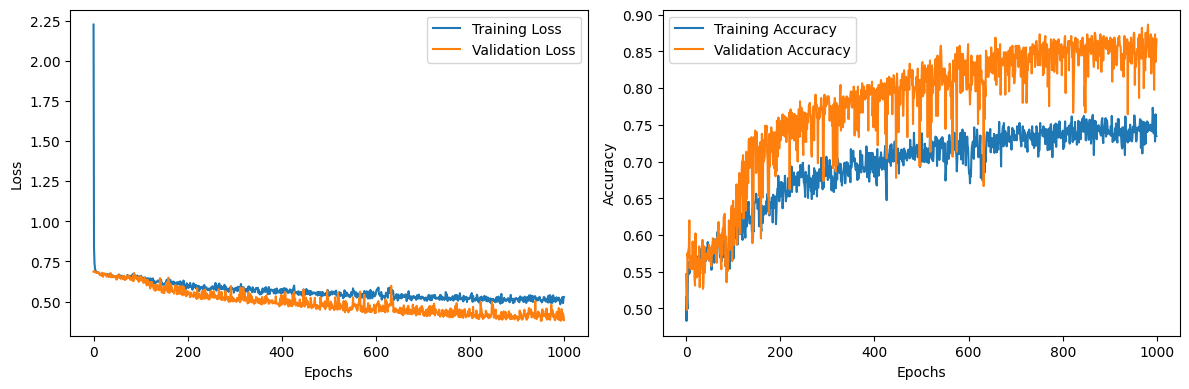

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3136      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,282
Trainable params: 5,282
Non-trainable params: 0
_________________________________________________________________


In [51]:
import matplotlib.pyplot as plt


# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model.summary()

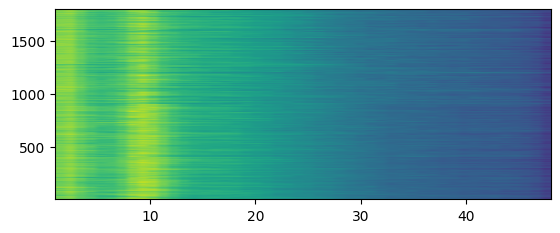

In [4]:
all_images = np.concatenate([mci_data, hc_data])

from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
data = normalize(all_images, axis=1, norm='l2')
plt.imshow(data,extent=[1, 48, 1, 1800], aspect=0.01)#,cmap='gray')

PermutationExplainer explainer: 1801it [00:53, 27.46it/s]                          


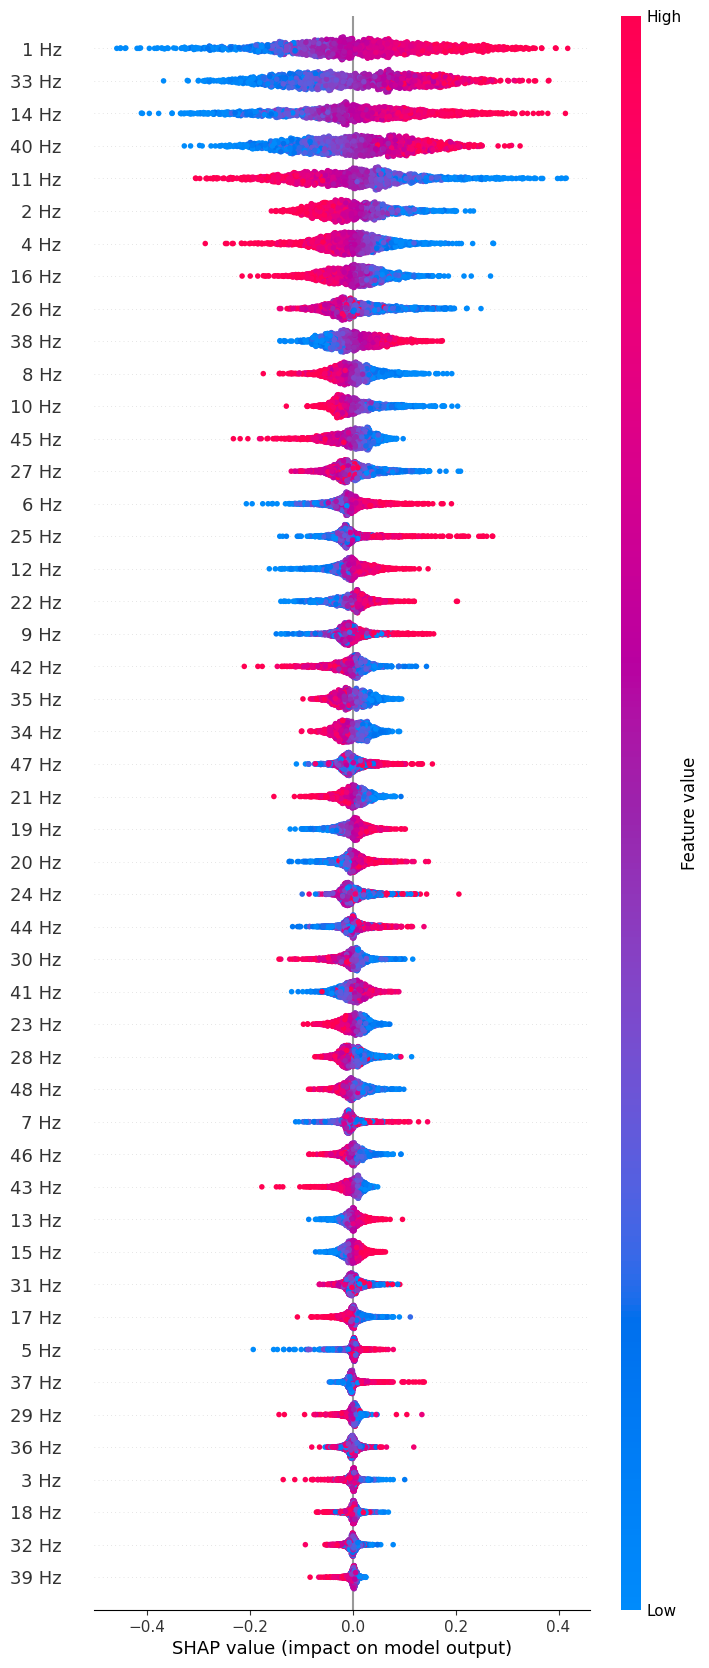

In [52]:
import shap
explainer = shap.Explainer(model, X,feature_names=characters)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values[:,:,0], max_display=48)

PermutationExplainer explainer: 1801it [00:50, 29.42it/s]                          


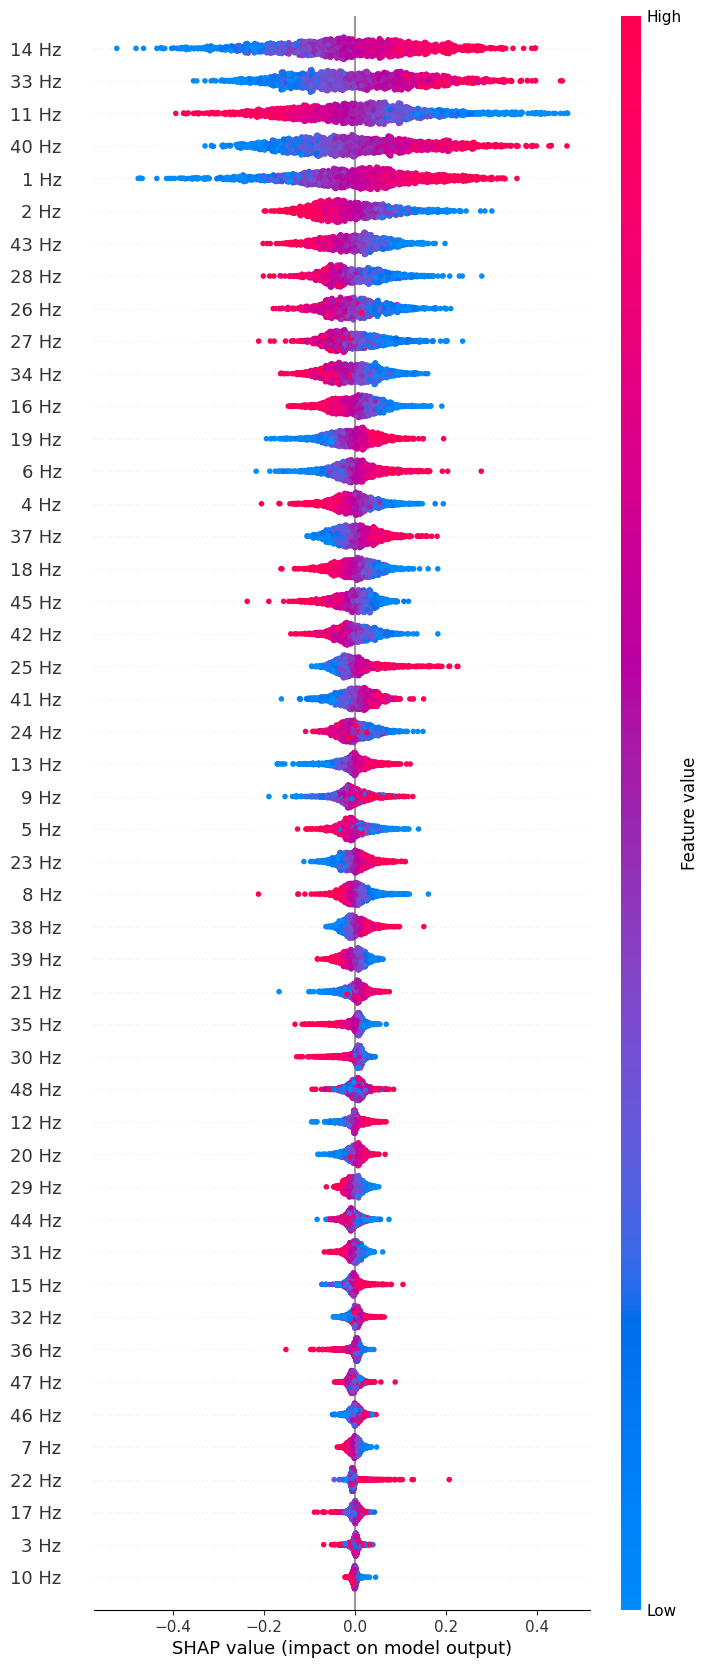

In [49]:
import shap
explainer = shap.Explainer(model, X,feature_names=characters)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values[:,:,0], max_display=48)

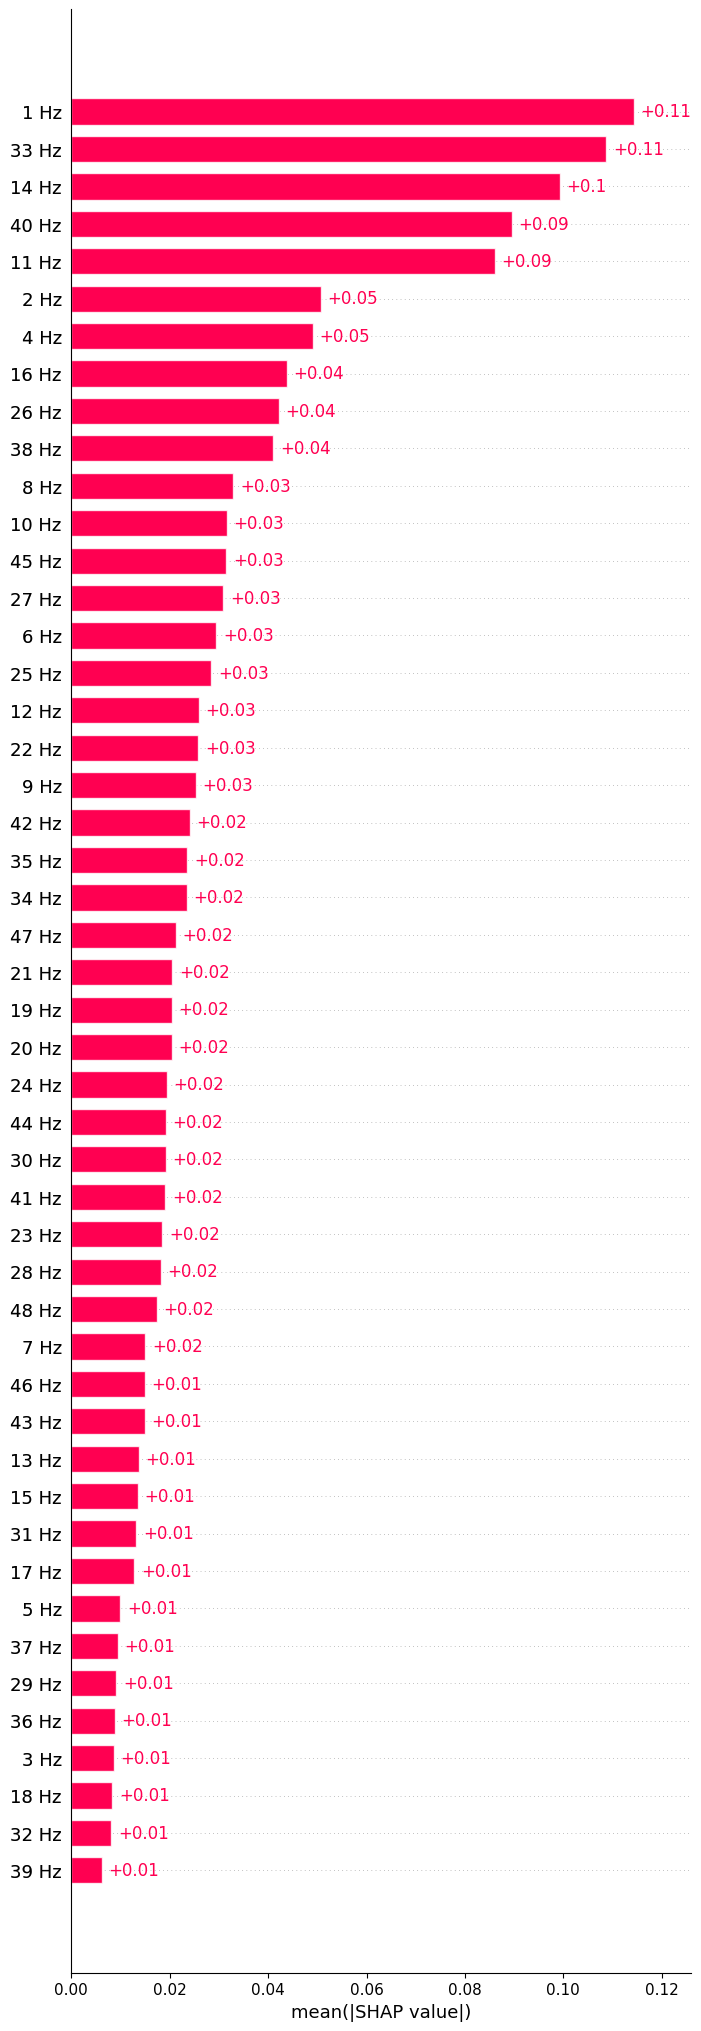

In [53]:
shap.plots.bar(shap_values[:,:,0].abs.mean(0), max_display=48)

{0: '1 Hz', 1: '2 Hz', 2: '3 Hz', 3: '4 Hz', 4: '5 Hz', 5: '6 Hz', 6: '7 Hz', 7: '8 Hz', 8: '9 Hz', 9: '10 Hz', 10: '11 Hz', 11: '12 Hz', 12: '13 Hz', 13: '14 Hz', 14: '15 Hz', 15: '16 Hz', 16: '17 Hz', 17: '18 Hz', 18: '19 Hz', 19: '20 Hz', 20: '21 Hz', 21: '22 Hz', 22: '23 Hz', 23: '24 Hz', 24: '25 Hz', 25: '26 Hz', 26: '27 Hz', 27: '28 Hz', 28: '29 Hz', 29: '30 Hz', 30: '31 Hz', 31: '32 Hz', 32: '33 Hz', 33: '34 Hz', 34: '35 Hz', 35: '36 Hz', 36: '37 Hz', 37: '38 Hz', 38: '39 Hz', 39: '40 Hz', 40: '41 Hz', 41: '42 Hz', 42: '43 Hz', 43: '44 Hz', 44: '45 Hz', 45: '46 Hz', 46: '47 Hz', 47: '48 Hz'}


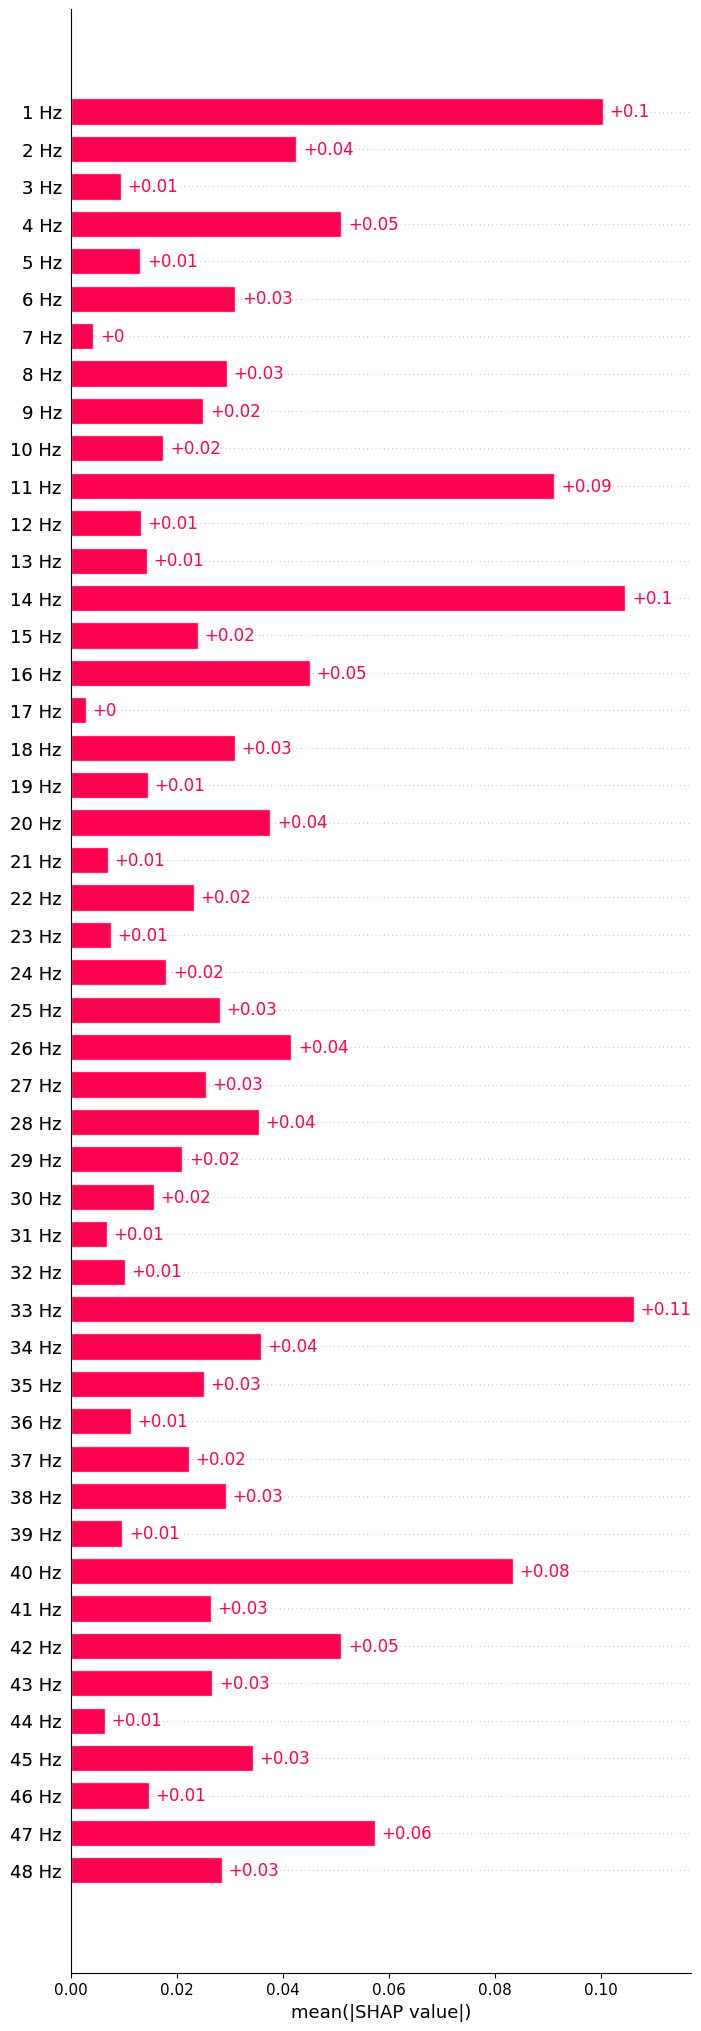

In [46]:

# Assuming X is a NumPy array
num2col = {i: f'{i+1} Hz' for i in range(X.shape[1])}
col2num = {col: i for i, col in num2col.items()}

# Assuming 'order' is a list of valid column names
order = [col for col in order if col in col2num]
print(num2col)

# Rest of your code
if order:
    order_indices = list(map(col2num.get, order))
    shap.plots.bar(shap_values[:,:,0].abs.mean(0), order=order_indices, max_display=48)
    plt.show()
else:
    print("Invalid order list or empty order list.")


{0: '1 Hz', 1: '2 Hz', 2: '3 Hz', 3: '4 Hz', 4: '5 Hz', 5: '6 Hz', 6: '7 Hz', 7: '8 Hz', 8: '9 Hz', 9: '10 Hz', 10: '11 Hz', 11: '12 Hz', 12: '13 Hz', 13: '14 Hz', 14: '15 Hz', 15: '16 Hz', 16: '17 Hz', 17: '18 Hz', 18: '19 Hz', 19: '20 Hz', 20: '21 Hz', 21: '22 Hz', 22: '23 Hz', 23: '24 Hz', 24: '25 Hz', 25: '26 Hz', 26: '27 Hz', 27: '28 Hz', 28: '29 Hz', 29: '30 Hz', 30: '31 Hz', 31: '32 Hz', 32: '33 Hz', 33: '34 Hz', 34: '35 Hz', 35: '36 Hz', 36: '37 Hz', 37: '38 Hz', 38: '39 Hz', 39: '40 Hz', 40: '41 Hz', 41: '42 Hz', 42: '43 Hz', 43: '44 Hz', 44: '45 Hz', 45: '46 Hz', 46: '47 Hz', 47: '48 Hz'}


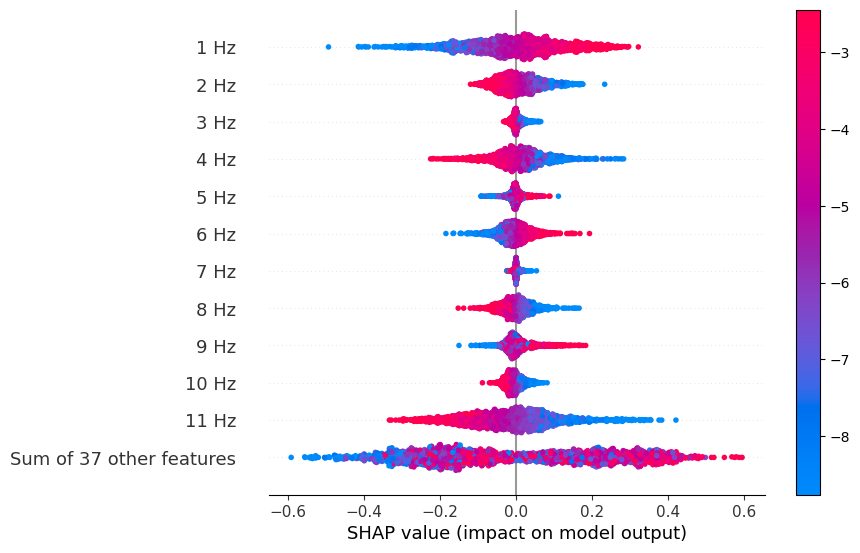

In [40]:

# Assuming X is a NumPy array
num2col = {i: f'{i+1} Hz' for i in range(X.shape[1])}
col2num = {col: i for i, col in num2col.items()}

# Assuming 'order' is a list of valid column names
order = [col for col in order if col in col2num]
print(num2col)

# Rest of your code
if order:
    order_indices = list(map(col2num.get, order))
    shap.plots.beeswarm(shap_values[:,:,0], max_display=12, show=False, color_bar=False, order=order_indices)
    plt.colorbar()
    plt.show()
else:
    print("Invalid order list or empty order list.")


In [1]:
import keras
keras.backend.clear_session()


import os
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

# Set the path to your data folders
ad_folder = "/gpfs/data/user/devanand/scripts/ASR_epochwise_EC_PSD/AD_agematched"
he_folder = "/gpfs/data/user/devanand/scripts/ASR_epochwise_EC_PSD/HE_agematched"

# Function to load data from mat files
def load_data(folder):
    data = []
    for filename in os.listdir(folder):
        if filename.endswith(".mat"):
            file_path = os.path.join(folder, filename)
            mat_data = scipy.io.loadmat(file_path)
            vector = mat_data['pp']  # Replace 'your_vector_key' with the key in your mat file
            data.append(vector)
    return data

# Load data from AD and HE folders
ad_data = load_data(ad_folder)
he_data = load_data(he_folder)

# Combine and label the data
X = np.vstack(ad_data + he_data)
y = np.hstack([np.zeros(len(ad_data)), np.ones(len(he_data))])

# Perform one-hot encoding on labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.25, random_state=42)

# Define the neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(48,)))
model.add(layers.Dropout(0.5))  # Add dropout here
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))  # Add dropout here
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy}")

2024-02-05 15:32:11.723280: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/gpfs/data/user/devanand/.conda/envs/test-gpu/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
2024-02-05 15:33:12.044331: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-05 15:33:15.812011: I tensorflow

Epoch 1/1000
133/133 [==============================] - 6s 5ms/step - loss: 0.8177 - accuracy: 0.4875 - val_loss: 0.6611 - val_accuracy: 0.5844
Epoch 2/1000
133/133 [==============================] - 0s 3ms/step - loss: 0.7185 - accuracy: 0.5433 - val_loss: 0.6427 - val_accuracy: 0.6780
Epoch 3/1000
133/133 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.5764 - val_loss: 0.6314 - val_accuracy: 0.6879
Epoch 4/1000
133/133 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.6147 - val_loss: 0.6244 - val_accuracy: 0.7177
Epoch 5/1000
133/133 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.6397 - val_loss: 0.6089 - val_accuracy: 0.7234
Epoch 6/1000
133/133 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.6468 - val_loss: 0.6047 - val_accuracy: 0.7404
Epoch 7/1000
133/133 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.6567 - val_loss: 0.5941 - val_accuracy:

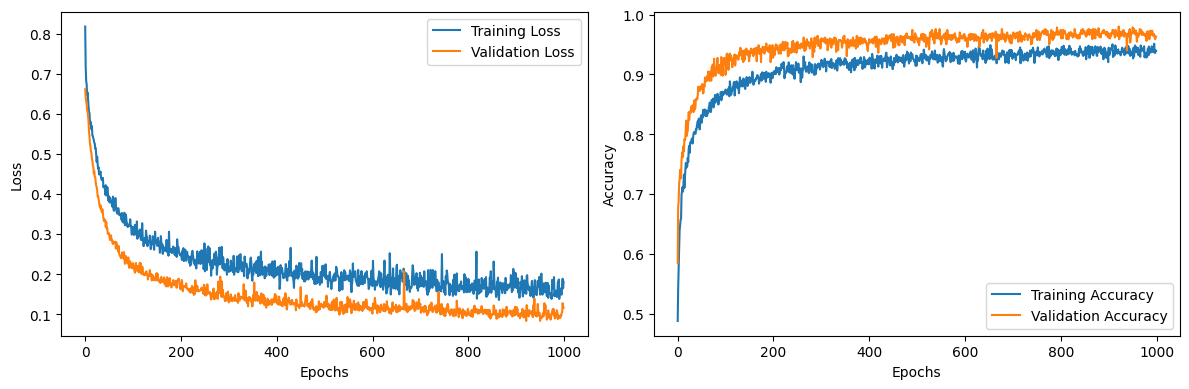

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3136      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,282
Trainable params: 5,282
Non-trainable params: 0
_________________________________________________________________


In [2]:
import matplotlib.pyplot as plt


# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model.summary()